In [1]:
#KNN---assumes the similarity b/w the new data and the available data

# Step 1: Import Libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
import numpy as np
import seaborn as sns

In [2]:
 #Step 2: Data Preparation
# Load the data from CSV file
data = pd.read_csv('User_data.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
X = data[['Age', 'EstimatedSalary']]  # Features
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [5]:
y = data['Purchased']  # Target
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [6]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(     Age  EstimatedSalary
 336   58           144000
 64    59            83000
 55    24            55000
 106   26            35000
 300   58            38000
 ..   ...              ...
 323   48            30000
 192   29            43000
 117   36            52000
 47    27            54000
 172   26           118000
 
 [320 rows x 2 columns],
      Age  EstimatedSalary
 132   30            87000
 309   38            50000
 341   35            75000
 196   30            79000
 246   35            50000
 ..   ...              ...
 14    18            82000
 363   42            79000
 304   40            60000
 361   53            34000
 329   47           107000
 
 [80 rows x 2 columns],
 336    1
 64     0
 55     0
 106    0
 300    1
       ..
 323    1
 192    0
 117    0
 47     0
 172    0
 Name: Purchased, Length: 320, dtype: int64,
 132    0
 309    0
 341    0
 196    0
 246    0
       ..
 14     0
 363    0
 304    0
 361    1
 329    1
 Name: Purchased, Length: 80, dtyp

In [7]:
ss=StandardScaler()
x_train=ss.fit_transform(X_train)
x_test=ss.transform(X_test)

In [8]:
# Step 3: Model Training
# Initialize KNN model with 5 neighbors
#n_neighbors=5 means it will consider 5 nearest neighbors when making predictions
knn_model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

# Fit the model with training data
knn_model.fit(x_train, y_train)


KNeighborsClassifier()

In [9]:
# Step 4: Make Predictions
# Predict outcomes for the test set
y_pred = knn_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [10]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [11]:
# Step 5: Evaluate the Model
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 95.00%


In [12]:
prec = precision_score(y_test, y_pred)
print("Precision:",prec)

Precision: 0.875


In [13]:
recall = recall_score(y_test, y_pred)
print("recall:",recall)

recall: 0.9545454545454546


In [14]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[55,  3],
       [ 1, 21]], dtype=int64)

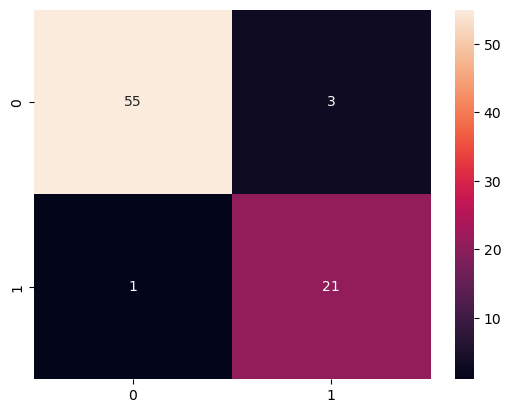

In [15]:
sns.heatmap(cm,annot=True)
plt.show()